# Household or Handheld: A statistical report on the mean sales of handheld devices vs home consoles.

# Introduction

While some individuals enjoy the convenience and lower price tag of handheld games such as the DS, others may prefer the traditional experience that home gaming consoles like Wii provide.  As the video game industry continues to grow, gaming companies can gain insight by looking at the popularity of these two platforms to decide which direction to launch their next project.

Due to the high popularity of console gaming in North America, with over half of American households owning a gaming console *(1)*, we expect there will be a significant difference in the mean game sales, with the mean sales of home console video games being higher than that of handheld games. With that being said, we are not confident enough in this claim to make our testing one-sided, therefore, in our project we will be exploring the research question, "Is there a difference in the popularity of handheld devices and home consoles for gaming in North America?".

To answer this inferential question, the dataset we will be investigating is the "Video Game Sales" dataset found on Kaggle, by Gregory Smith, with our location parameter being the mean and the scale parameter being the standard deviation. The dataset consists of the sales data for 10,129 games released in North America from 1980 to 2020. However, we chose to use 2001 as a cutoff year because it is the release year of modern milestones, the home Xbox and the handheld Game Boy Advance *(2)*. There are 11 variables, but we are only interested in North American sales in millions and the platform. There are no missing values in this dataset.


# Methods and Results

In [1]:
install.packages("tidymodels") # uncomment for colab

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘Rcpp’, ‘diagram’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘warp’, ‘iterators’, ‘lhs’, ‘DiceDesign’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘foreach’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’




In [2]:
# Loading the packages we need
library(tidyverse)
library(tidymodels)

options(repr.plot.width = 10, repr.plot.height = 8)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.0 ──

✔ broom        1.0.5     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.2.0
✔ recipes      1.0.7     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
# Allows for the data to be reproducible
set.seed(100)

# Grabbing the data
url <- "https://raw.githubusercontent.com/xonew/Stat-201-21-Project/main/vgsales.csv"

#Reading data into R
gaming_dataset <- read_csv(url)

#Selecting columns we need for our analysis
gaming_data <- gaming_dataset %>%
filter(
Year > 2001,
NA_Sales > 0) %>%
select(Platform, NA_Sales) |>
  mutate(Platform = if_else(Platform %in% c("DS", "GBA", "GB", "PSV", "PSP"), "Handheld", "Home_Console"))

gaming_data

Rows: 16598 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Platform, Year, Genre, Publisher
dbl (6): Rank, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Platform,NA_Sales
<chr>,<dbl>
Home_Console,41.49
Home_Console,15.85
Home_Console,15.75
⋮,⋮
Handheld,0.01
Home_Console,0.01
Handheld,0.01


(Table 1: Table with tidy data)

We are interested in two columns:
- **Platform**: Platform on which video game is played (Home_Console or Handheld)
- **NA_Sales**: North American sales (in millions, USD)


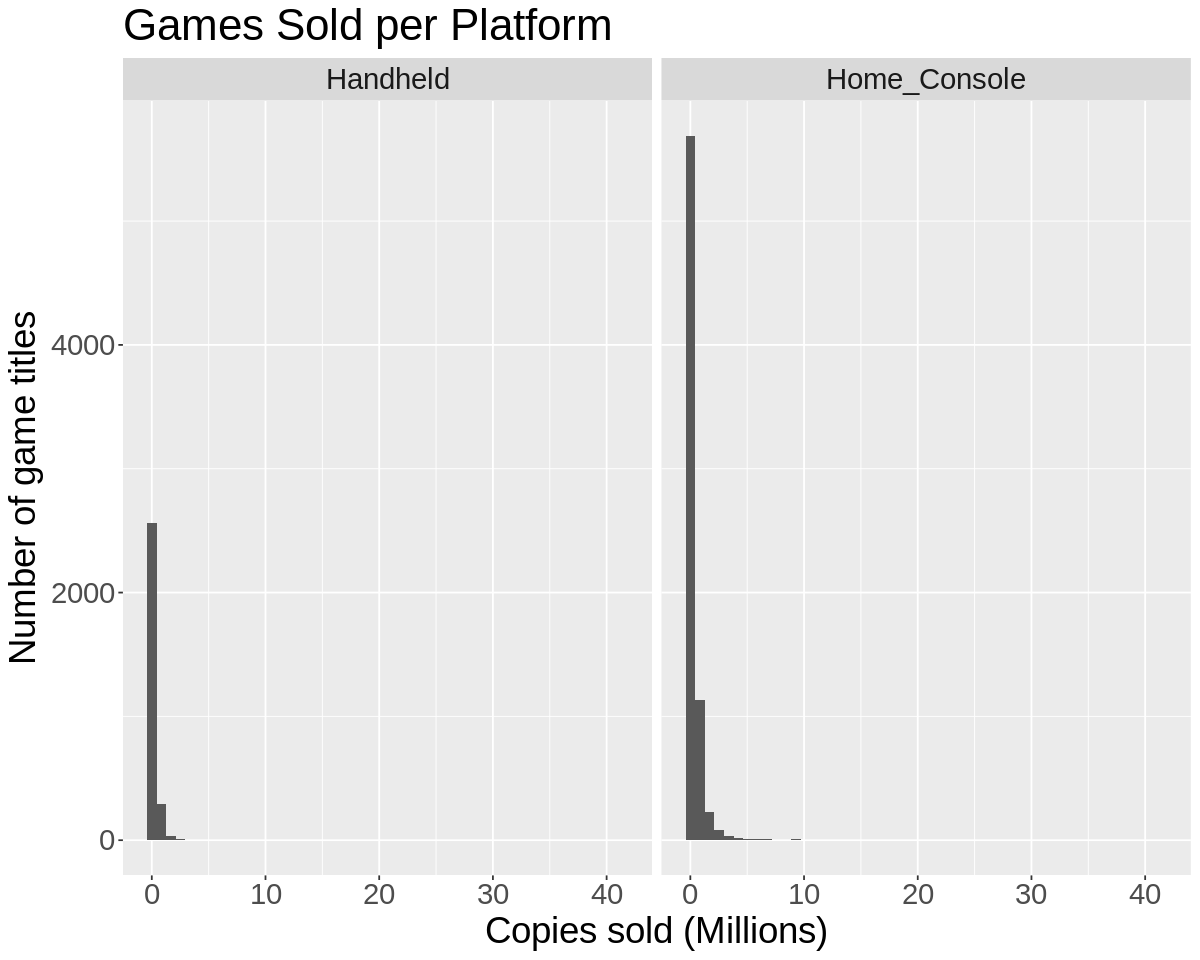

In [4]:
# Allowing the data to be reproducible
set.seed(100)

#Creating the sampling distributions
gaming_data_dist_na <-
gaming_data %>%
  ggplot() +
  geom_histogram(aes(x = NA_Sales), bins = 50) +
  facet_wrap(~ Platform) +
  xlab("Copies sold (Millions)") +
  ylab("Number of game titles") +
  ggtitle("Games Sold per Platform")+
  theme(text = element_text(size = 22))
gaming_data_dist_na

(Figure 1.1: Sampling distribution for handheld and home console systems in North America)

As we can see from *Figure 1.1*, the sampling distributions for both platforms are heavily right-skewed unimodal distributions. The number of total sales for home console systems eclipses that of the sales for handheld console systems, but the centers of the distributions appear to be fairly close to one another. Note that there are values on the right of the graph, but they are not visible due to being too small.

In [5]:
# Allowing the data to be reproducible
set.seed(100)

# Calculating total sales and titles
total_sales <- sum(gaming_data$NA_Sales)
total_titles <- NROW(gaming_data)

# Computing summary statistics
sum_stats <-
  gaming_data |>
  group_by(Platform) |>
  summarise(Num_Titles = n(),
            Sales_Total = sum(NA_Sales),
            Titles_Proportion = Num_Titles/total_titles,
            Sales_Proportion = Sales_Total/total_sales,
            Sales_Mean = mean(NA_Sales),
            Sales_SD = sd(NA_Sales))
Means_Diff  <- c(sum_stats$Sales_Mean[2]-sum_stats$Sales_Mean[1], "x")

# Degrees of freedom for our two sample t-test
Deg_Freedom <- c((sum_stats$Sales_SD[1]/sum_stats$Num_Titles[1] + sum_stats$Sales_SD[2]/sum_stats$Num_Titles[2])^2/(
                            sum_stats$Sales_SD[1]^4/(sum_stats$Num_Titles[1]^2*(sum_stats$Num_Titles[1])) +
                              sum_stats$Sales_SD[2]^4/(sum_stats$Num_Titles[2]^2*(sum_stats$Num_Titles[2]))), "x")

# Displaying the text
cbind(sum_stats, Means_Diff, Deg_Freedom)

Platform,Num_Titles,Sales_Total,Titles_Proportion,Sales_Proportion,Sales_Mean,Sales_SD,Means_Diff,Deg_Freedom
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Handheld,2912,667.83,0.2874914,0.2015963,0.2293372,0.5101972,0.137141921185023,19848.0371669035
Home_Console,7217,2644.88,0.7125086,0.7984037,0.3664791,0.9114268,x,x


(Table 1.2: Summary statistics for the two platforms)

The total number of titles and sales for each type of console are shown, as well as their corresponding proportions. We can see that the number of titles for handheld systems is under-represented by their sales, which points to a difference in means.

Sample estimates for our center and scale variables have also been calculated: the mean and standard deviation, respectively. We chose to use these types of parameters because they are sensitive to outliers, which corresponds well to our heavily skewed dataset.

Finally, we have an estimate of our parameter of interest: the difference in means. It is not zero, but whether it is "significantly not zero" needs to be investigated. We also have calculated the degrees of freedom that will be used in the upcoming t-test.

### Hypothesis Testing

This report seems to be trustworthy because the dataset is quite large, uses current data (2001-2015), and the data points are distinct. The plots and statistics we have provided thus far provide an estimate of our relevant parameters but they are not enough by itself to prove a significant difference in means.

In order to determine whether there is a significant difference in means, we will conduct a two-sided simulation-based hypothesis test using permutation. We will also conduct a two-sided two-sample t-test using t test with 19848 degrees of freedom. The Central Limit Theorem will apply due to our large sample size; we need this due to our highly skewed sample.

The p-values of both hypothesis tests will be tested against a significance level of 0.05 as this is the most common significance level used in the sciences *(3)*.

Null hypothesis ($H_0$): There is no significant difference in means between handheld and home console sales in North America.  

$H_0: \mu_1 - \mu_2 = 0$

Alternative hypothesis ($H_1$): There is a significant difference in means between handheld and home console sales in North America.  

$H_1: \mu_1 - \mu_2 \neq 0$

#### Simulation-Based Hypothesis Test Using Permutation

In [6]:
# Allowing the data to be reproducible
set.seed(100)

#Calculating the observed mean difference between home console game sales and handheld game sales
obs_mean_sales_diff <- gaming_data |>
specify(formula = NA_Sales ~ Platform) |>
calculate(stat="diff in means", order=c("Home_Console", "Handheld"))

obs_mean_sales_diff

stat
<dbl>
0.1371419


(Table 1.3: Mean difference in sales between the two consoles, millions of USD)

In [7]:
# Allowing the data to be reproducible
set.seed(100)

#Simulating the null distribution
null_diff_in_means <- gaming_data |>
specify(formula = NA_Sales ~ Platform) |>
hypothesize(null="independence") |>
generate(reps=1000, type = "permute") |>
calculate(stat="diff in means", order=c("Home_Console", "Handheld"))

head(null_diff_in_means)

replicate,stat
<int>,<dbl>
1,1.065897e-02
2,-5.858080e-03
3,1.782584e-02
4,8.711822e-03
5,-2.165027e-06
6,-1.830250e-02


(Tables 1.4: Null difference in means)

Here we have used the infer package to obtain the observed mean difference between console and handheld games (in that order).  We then simulated the null distribution using permutation with the infer package.  We did so using 1000 different permutations, where in each permutation the handheld games and console games are randomly assigned to different values from the NA_Sales column and the mean difference is calculated in each sample.

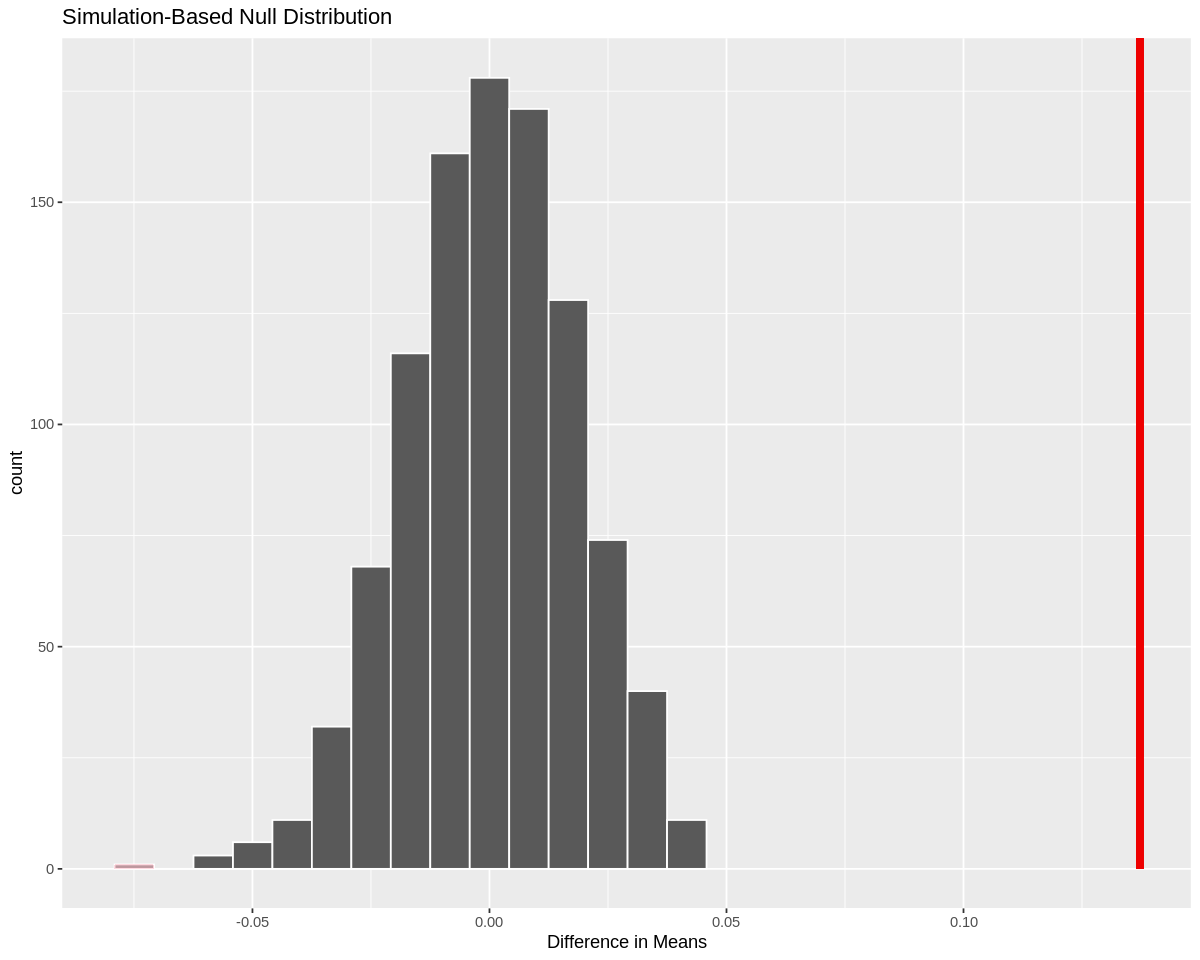

In [10]:
# Allowing the data to be reproducible
set.seed(100)

#Visualising the null distribution and where our obersved test statistic lies
diff_in_means_plot <- null_diff_in_means |>
visualize() +
shade_p_value(obs_stat= obs_mean_sales_diff, direction= "both") +
xlab("Difference in Means")

diff_in_means_plot

(Figure 1.2: Null distribution for difference in means between the two platforms)

Here we have visualised this simulated null distribution via a histogram and shaded the values that are more extreme than the observed test statistic in red.

In [11]:
# Allowing the data to be reproducible
set.seed(100)

#obtaining p-value
p_value <- null_diff_in_means %>%
  get_p_value(obs_stat = obs_mean_sales_diff, direction = "both")

p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


(Table 1.5: P-value obtained from simulated hypothesis testing)

The p-value is so small that it has been rounded down to 0. Therefore, at our signficance level of 0.05, we will reject the null hypothesis that the mean sales of handheld games is equivalent to that of console games in North America. Our evidence supports the alternative hypothesis that handheld game sales are different than console game sales in North America. This simulation based hypothesis test is very handy as it relies on very few assumptions, however the next hypothesis test we will do is a little more strict.

#### Theory-Based Hypothesis Testing using 2 Sample T-Test

This test is dependent on the data being distributed normally, so it's important to ensure that the conditions of the Central Limit Theorem are satisfied. The underlying data is skewed, but this is acceptable as long as the sample size is large enough to fulfill the CLT. Secondly, our data is a random sample of obervations. Third, the observations in the sample are independent as none of the game sales generally affect the sales of the other video games. With these conditions met, the central limit theorem should apply and thus it is safe to assume our data will be roughly normally distributed.

In [12]:
# Allowing the data to be reproducible
set.seed(100)

#Computing Summary Statistics (similar to sum stats but mure concise, also comupting variance instead of standard deviation)
console_handheld_summary <- gaming_data %>%
     select(Platform, NA_Sales) %>%
     group_by(Platform) %>%
     summarise(n = n(),
               mean = mean(NA_Sales),
               var = var(NA_Sales),
               `.groups` = "drop") %>%
     pivot_wider(names_from = Platform, values_from = c(n, mean, var))

#Calculating and adding a column that shows the observed mean difference
console_handheld_summary <- console_handheld_summary %>%
mutate(mean_diff=mean_Home_Console-mean_Handheld)

#Caclulating the standard error under the null and adding a column that shows it
console_handheld_summary <- console_handheld_summary %>%
mutate(null_std_error= sqrt(var_Home_Console/n_Home_Console+var_Handheld/n_Handheld))

#Calculating the test statistic and adding a column that shows it
console_handheld_summary <- console_handheld_summary %>%
mutate(test_statistic=mean_diff/null_std_error)

#Calculating the p-value and adding a column that shows it
console_handheld_summary <- console_handheld_summary %>%
mutate(p_value=2*(1-pt(test_statistic, df=19848.0371669035)))


console_handheld_summary

n_Handheld,n_Home_Console,mean_Handheld,mean_Home_Console,var_Handheld,var_Home_Console,mean_diff,null_std_error,test_statistic,p_value
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2912,7217,0.2293372,0.3664791,0.2603012,0.8306988,0.1371419,0.01430008,9.590292,0


(Table 1.6: Summary statistics)

We start by providing an overview summarizing the figures of console and handheld games, encompassing total counts, mean sales figures, and variances for each category. Next, we determine the mean difference between console and handheld game sales by subtracting the average sales of handheld games from that of console games.

After, we compute the standard error using the formula $\sqrt{s_1^2/n_1 + s_2^2/n_2}$, where $s_1$ and $s_2$ represent the sample standard deviations and $n_1$ and $n_2$ denote the respective sample sizes. The test statistic is then calculated by dividing the previously determined mean difference by the computed standard error.

We calculate the p-value through the application of our test statistic and the degrees of freedom (established earlier) using the pt function. This gives the probability of obtaining a value more extreme than our test statistic, within the t-distribution, on either side. We use the t-distribution due to the absence of population standard deviation data, supplementing it with an estimation from our sample.

As in our simulation-based hypothesis test, the resulting p-value is exceedingly small (less than 0.01). Consequently, at our chosen significance level of 0.05, we opt to reject the null hypothesis, and support the alternative hypothesis that handheld game sales are different than console game sales in North America.

In [13]:
# Allowing the data to be reproducible
set.seed(100)

#Creating a dataset with only console games
console <- gaming_data |>
select(Platform, NA_Sales) |>
filter(Platform=="Home_Console")

#Creating a dataset with only handheld games
handheld <- gaming_data |>
select(Platform, NA_Sales) |>
filter(Platform=="Handheld")

#Doing a T-test on our data (Yields same results as before but used it here to ensure our numbers were correct)
console_handheld_t_test <- tidy(
        t.test(x = console$NA_Sales,
               y = handheld$NA_Sales,
               alternative = "two.sided"))

console_handheld_t_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.1371419,0.3664791,0.2293372,9.590292,1.111168e-21,9128.52,0.1091106,0.1651733,Welch Two Sample t-test,two.sided


(Table 1.7: Results from 2 sample t-test)

Here we have confirmed our results our 2 sample t-test using a more straight forward t.test function.  You can see the test statistic is the same, but one benefit is that we get a more precise, unrounded p-value of 1.111168e-21.

**95% Confidence Interval**

Now, we will obtain a 95% confidence interval using the central limit theorem to support our hypothesis test results. 95% is the chosen interval so that it is consistent with the hypothesis test's significance level of 0.05.

In [14]:
# Allowing the data to be reproducible
set.seed(100)

#Obtaining a 95% Confidence interval for the mean difference between Console game sales and Handheld games sales (in that order)
console_handheld_clt_ci <-
     tibble(lower_ci = console_handheld_summary$mean_diff - (qnorm(0.975)*console_handheld_summary$null_std_error),
            upper_ci = console_handheld_summary$mean_diff + (qnorm(0.975)*console_handheld_summary$null_std_error))

console_handheld_clt_ci

#Same thing except using t-distribution.  Gives very similar results due to our large sample size.
clt_t_ci <-
     tibble(lower_ci = console_handheld_summary$mean_diff - (qt(0.975, df=19848.0371669035)*console_handheld_summary$null_std_error),
            upper_ci = console_handheld_summary$mean_diff + (qt(0.975, df=19848.0371669035)*console_handheld_summary$null_std_error))

clt_t_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.1091143,0.1651696


lower_ci,upper_ci
<dbl>,<dbl>
0.1091126,0.1651713


(Tables 1.8 and 1.9: Confidence intervals)

Here we have 95% confidence intervals for the mean difference between console game sales and handheld games sales using the normal distribution and the t-distribution.  We used the mean difference and standard error that we found from the prior 2-sample t-test.  Both confidence intervals are very similar which makes sense since our sample size is so large and the t-distribution tends towards the normal distribution at larger sample sizes; larger tails start to thin out and become similar to that of the normal distribution as the sample size increases and the degrees of freedom increase.  Overall, these 2 confidence intervals support our hypothesis testing as the confidence intervals do not contain zero supporting that there is a meaningful difference.

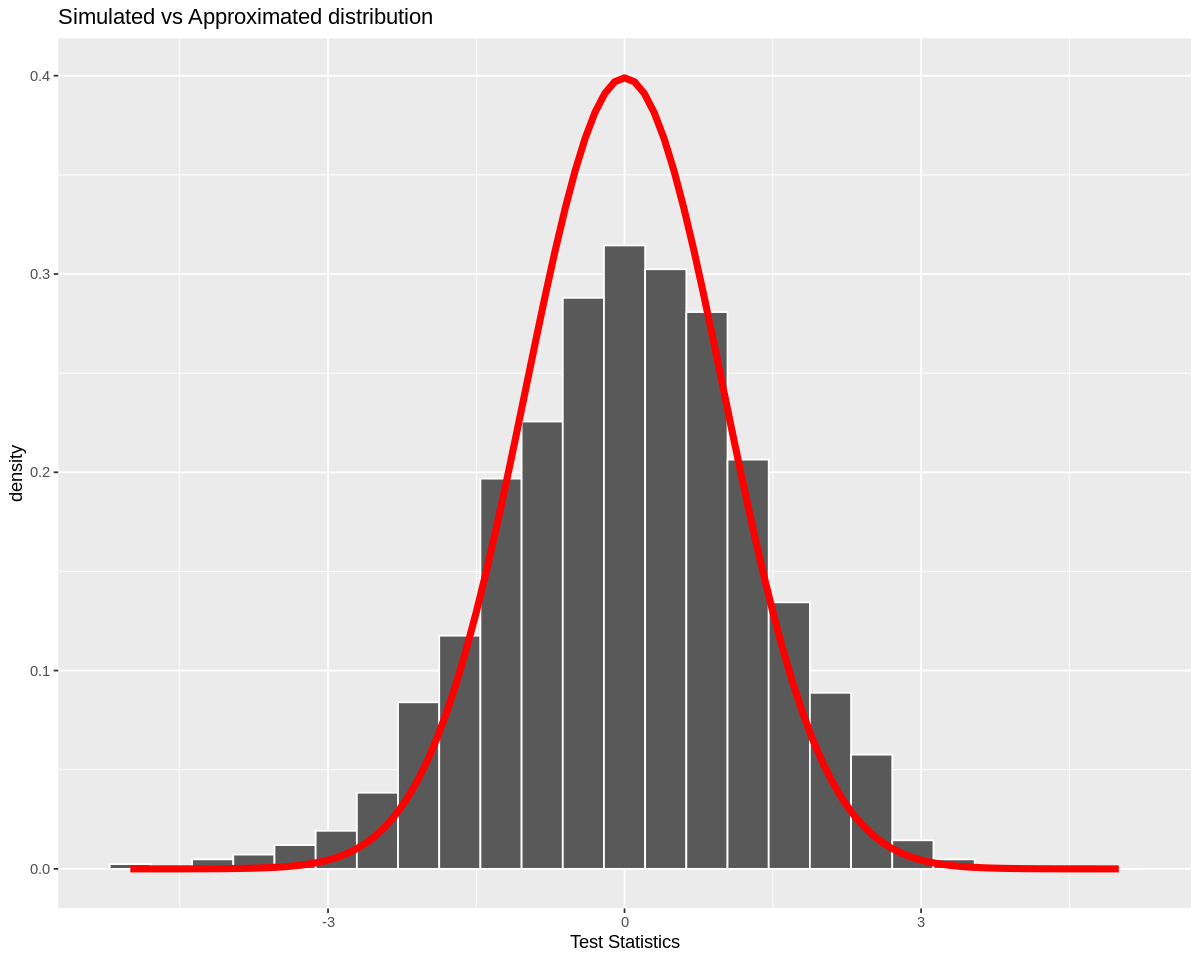

In [15]:
#Visualising the null distribution and where our observed test statistic lies
null_diff_in_means |>
ggplot() +
ggtitle("Simulated vs Approximated distribution") +
geom_histogram(aes(x = stat/console_handheld_summary$null_std_error, y = after_stat(density)), bins = 25, color = 'white') +
xlab("Test Statistics") +
geom_line(data = tibble(x = seq(-5, 5, 0.1),
                             density = dt(x, 19848.0371669035)),
               aes(x = x, y = density), color = "red", lwd = 2)

(Figure 1.3: t-distribution with relevant degrees of freedom superimposed on top of our simulated distribution)

We can see that the approximation is quite close to the simulated distribution, showing the accuracy of the T-distribution and CLT under the right conditions.

# Discussion

**Results and Findings:**

In our investigation, we first conducted a simulation-based hypothesis test to identify whether there is a difference in means between the popularity of handheld gaming consoles and home gaming consoles. From this, we found there is indeed a difference in means between the two platforms within our sample. To further test whether our difference is significant to our population, we conducted a two sample t-test. The p-values obtained from both tests were lower than our significance level of 0.05. After the hypothesis tests, we checked the 95% confidence intervals with both the normal distribution and t-distribution. The intervals are very similar and do not contain 0, also suggesting that there is a significant difference in the two groups. All of these findings allow us to reject the null hypothesis that there is no difference in the mean sales of the two groups.

**Comparison between two hypothesis tests**

Both simulated null distributions and asymptotic null distributions exhibit similar levels of accuracy within the context of this report. Simulated hypothesis testing offers the advantage of requiring minimal assumptions about the data, enabling comprehensive visualization and verification of each analytical step. However, this method is susceptible to random errors when dealing with small sample sizes. On the other hand, the t-test, a widely accepted technique for assessing significant differences in means, provides a more accessible approach. It generally demands less detailed explanation compared to simulated tests. Notably, as the sample size increases, the computational effort required for applying the t-test remains relatively stable, making it an efficient choice.

For instances involving very large sample sizes, such as those illustrated in this report, mathematical approximations prove to be more suitable for quick statistical analysis. These approximations are significantly faster to perform compared with simulation-based methods. In the course of preparing this report, attempts to enhance the accuracy of simulated models by increasing the number of permutations led to substantial runtime increases and system crashes. In contrast, the execution time for applying the t-test is constant with growing sample sizes.

**Impact:**

This game sales analysis provides a meaningful understanding of the gaming market in North America since 2001. Our data finds that there is a significant difference in the mean game sales between the handheld and home console platforms. This finding urges companies interested in selling games to the North American population to carefully consider the platform that they choose to develop their games, as their sales may differ greatly.



**Future Questions**

Future questions this could lead to are:
- If this inferential question used a dataset with a shorter range of years, would the results differ? Would this exploration be able to identify specific year ranges where handheld games were more popular than or were equally as popular than home consoles?

- If this inferential question used a dataset with data from only the past few years, how would the results differ from this exploration (which contains data from 2001-2020)? Do console games remain more popular in 2020-2023, or has the trend changed?

- Is the significant difference in means due to the popularity of specific consoles (Wii, PS), rather than its platform?
- Other variations of this question could be investigating the effect of the company that manufactured the console or the genre of the game.

- If we investigated another geographic region, such as Japan or Europe, would the results differ?


# References

0. GregorySmith. (2016, October 26). Video game sales. Kaggle. https://www.kaggle.com/datasets/gregorut/videogamesales

1. Owens, T. (2022, August 11). Gaming console ownership and purchase intentions among households in the United States as of May 2021. Statista. https://www.statista.com/statistics/1277164/purchase-video-game-consoles/

2. Encyclopædia Britannica, inc. (2023, July 19). Xbox. Encyclopædia Britannica. https://www.britannica.com/technology/Xbox

3. Ross, Sheldon M. (2017). Chapter 9 - Testing Statistical Hypothesis. Introductory Statistics (Fourth edition). https://doi.org/10.1016/B978-0-12-804317-2.00009-6